In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('/Users/apple/Learning python/titanic/train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline

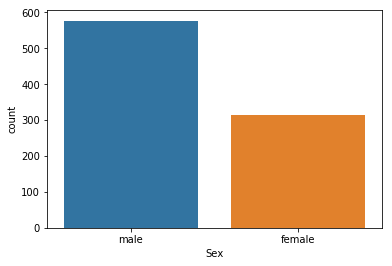

In [5]:
sbs.countplot(x='Sex', data=titanic_df)

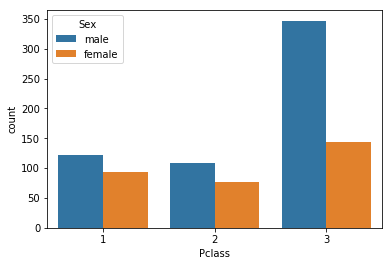

In [6]:
sbs.countplot(x='Pclass', hue='Sex', data=titanic_df)

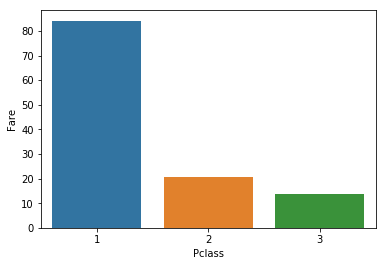

In [7]:
df1=titanic_df[['Pclass','Fare']].groupby(['Pclass'], as_index=False).mean()
sbs.barplot(x='Pclass',y='Fare',data=df1)

In [8]:
def isalone(passenger):
    sb,par = passenger
    if sb == 0 & par == 0:
        return 1
    else:
        return 0
titanic_df['IsAlone']=titanic_df[['SibSp','Parch']].apply(isalone,axis=1)

In [9]:
def adult_child(age):
    if age < 16:
        return 'child'
    else:
        return 'adult'
titanic_df['person']=titanic_df['Age'].apply(adult_child)

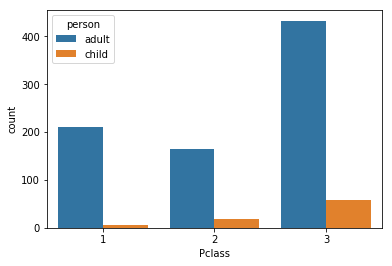

In [10]:
sbs.countplot(x='Pclass', hue='person', data=titanic_df)

[Text(0,0.5,'% survived')]

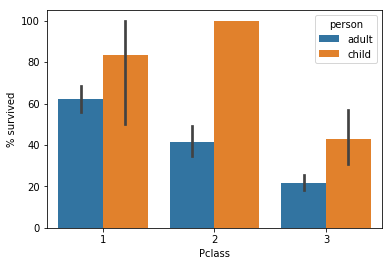

In [39]:
ax=sbs.barplot(x='Pclass',y='Survived', hue='person', data = titanic_df, estimator = lambda y: sum(y==1)*100/len(y))
ax.set(ylabel='% survived')

In [12]:
from scipy.stats import chi2_contingency

In [13]:
titanic_df[['Survived','IsAlone']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.466431
1,1,0.345395


In [14]:
tab4= pd.crosstab(titanic_df['IsAlone'],titanic_df['Survived'])
chi2, p, dof, expected = chi2_contingency(tab4)
chi2,p

(11.455628141250449, 0.0007127779147796163)

In [15]:
#Pivot Survived w/ Age class
titanic_df[['Survived','person']].groupby(['person'], as_index=False).mean().sort_values(by='Survived', 
                                                                                         ascending=False)

,person,Survived
1,child,0.590361
0,adult,0.362624


In [16]:
tab1= pd.crosstab(titanic_df['person'],titanic_df['Survived'])
chi2, p, dof, expected = chi2_contingency(tab1)
chi2,p

(15.556993340077092, 8.005497211300105e-05)

In [17]:
#Pivot Pclass w/ Survived
titanic_df[['Survived','Pclass']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
#Chi square test of independence
tab2= pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])
chi2, p, dof, expected = chi2_contingency(tab2)
chi2,p

(102.88898875696056, 4.549251711298793e-23)

In [19]:
#Pivot Sex w/ Survived
titanic_df[['Survived','Sex']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
tab3= pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])
chi2, p, dof, expected = chi2_contingency(tab3)
chi2,p

(260.71702016732104, 1.1973570627755645e-58)

In [21]:
#recode into integer
titanic_df['gender']=titanic_df['Sex']
Sex_recoded = {'male': 1,'female': 2} 
titanic_df.gender = [Sex_recoded[item] for item in titanic_df.gender]

In [22]:
data = titanic_df[titanic_df['Age'].notnull()]
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
data.loc[data.Age<=20,'Age']=1

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
data.loc[(data.Age>20)&(data.Age<=28),'Age']=2

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
data.loc[(data.Age>28)&(data.Age<=38),'Age']=3

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
data.loc[data.Age>38,'Age']=4

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
import statsmodels.api as sm
X=data[['gender','Pclass','Age']]
X=sm.add_constant(X)
y=data['Survived']
logit_model=sm.Logit(y,X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.459957
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 Oct 2018   Pseudo R-squ.:                  0.3190
Time:                        12:24:57   Log-Likelihood:                -328.41
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 2.146e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3661      0.499     -0.734      0.463      -1.343       0.611
gender         2.5502      0.206     12.385      0.000       2.147       2.954
Pclass        -1.2053      0.135     -8.905      0.000      -1.471      -0.940
Age           -0.3762      0.097     -3.882      0.000      -0.566      -0.186
==============================================================================
"""

In [115]:
from math import log,exp
def prob_estimate(x1,x2,x3):
    return exp(log(1.86 + 2.9*x1 - 1.7*x2 - 0.37* x3 ))/(1 + exp(log(1.86 + 2.9*x1 - 1.7*x2 - 0.37* x3)))

In [117]:
prob_estimate(2,1,2)

0.8392282958199356